#**Data & Transportation Final Project**
##Tourists Recommendation System
###*Computer Science - Ruppin Academic Center*

####Shai Shmuel, Rony Marshall, Uriel Bender

#####**Main NoteBook - Neural Network**

In [ ]:
#Import All The Library we Need for the Data Prep ans Visualization
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#####Upload The CSV File

In [ ]:
uploaded = files.upload()

Saving activitiesWithAccomodation2.csv to activitiesWithAccomodation2.csv


In [ ]:
activities = pd.read_csv(io.BytesIO(uploaded['activities.csv']))
activities.head(3)

,Unnamed: 0,Record ID,Activity ID,Travel Date,Activity Name,visit purpose category,religious affiliation category,first visit,country of origin,length of visit,arrival season,first activity of the day,last activity of the day,activity during the day,arrival date,total number of days,number of activity days,number of activities throughout the trip,number of activities per day for analysis,activity weekday,activity month,year,total minutes of activity,Arriving Time hour,tourist final aria,organized day trip,precentage organized transportation excluding walking,precentage taxi excluding walking,precentage private vehicle excluding walking,precentage public transportation excluding walking,day category,Jerusalem visiting category,Morning accommodation\nlocation,Evening accommodation\nlocation,activity purpose,Tourist in organized group
0,23,17545,57602,12/2/2015,"פארק גשר הצבים, נחל אלכסנדר",family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,3,Wednesday,12,2015,87,11,עמק חפר,No,0%,0%,100%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0
1,45,17545,68933,12/7/2015,פארק עם הכלב,family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,2,Monday,12,2015,25,13,בורגתה,No,0%,0%,0%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0
2,47,17545,68935,12/7/2015,אזור המושב,family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,2,Monday,12,2015,2,20,בורגתה,No,0%,0%,0%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0


In [ ]:
activities=activities[['Record ID','Activity ID','Travel Date','Activity Name','visit purpose category','religious affiliation category','first visit','country of origin','length of visit',
                       'arrival season', 'first activity of the day','last activity of the day', 'activity during the day', 'arrival date','total number of days', 'number of activity days',
                       'number of activities throughout the trip','number of activities per day for analysis', 'activity weekday','activity month','year','total minutes of activity','Arriving Time hour',
                       'tourist final aria','organized day trip','precentage organized transportation excluding walking','precentage taxi excluding walking','precentage private vehicle excluding walking',
                       'precentage public transportation excluding walking','day category','Jerusalem visiting category','Morning accommodation\nlocation']]

In [ ]:
activities=activities.rename(columns={'Record ID':'tourist_id','Activity ID':'act_id','Travel Date':'act_date','Activity Name':'act_name','visit purpose category':'visit_purpose','religious affiliation category':'religion','first visit':'is_first_visit',
                                      'country of origin':'origin','length of visit':'is_long_visit','arrival season':'arrival_season','first activity of the day':'is_first_act_of_day','last activity of the day':'is_last_act_of_day',
                                      'activity during the day':'is_act_during_day','arrival date':'arrival_date','total number of days':'total_visit_days','number of activity days':'total_act_days','number of activities throughout the trip':'total_act',
                                      'number of activities per day for analysis':'act_per_day','activity weekday':'act_weekday','activity month':'act_month','year':'act_year','total minutes of activity':'act_duration','Arriving Time hour':'act_start_hour',
                                      'tourist final aria':'act_place','organized day trip':'is_organized_day_trip','precentage organized transportation excluding walking':'organized_transportation_precent',
                                      'precentage taxi excluding walking':'taxi_precent','precentage private vehicle excluding walking':'private_vehicle_precent','precentage public transportation excluding walking':'public_tranport_precent',
                                      'day category':'day_category','Jerusalem visiting category':'jerusalem_visiting_category','Morning accommodation\nlocation':'accomodation_place'})

In [ ]:
#Print the shape of the data frame
activities.shape

(31644, 32)

In [ ]:
activities.columns

Index(['tourist_id', 'act_id', 'act_date', 'act_name', 'visit_purpose',
       'religion', 'is_first_visit', 'origin', 'is_long_visit',
       'arrival_season', 'is_first_act_of_day', 'is_last_act_of_day',
       'is_act_during_day', 'arrival_date', 'total_visit_days',
       'total_act_days', 'total_act', 'act_per_day', 'act_weekday',
       'act_month', 'act_year', 'act_duration', 'act_start_hour', 'act_place',
       'is_organized_day_trip', 'organized_transportation_precent',
       'taxi_precent', 'private_vehicle_precent', 'public_tranport_precent',
       'day_category', 'jerusalem_visiting_category', 'accomodation_place'],
      dtype='object')

In [ ]:
activities.act_start_hour = activities.act_start_hour.mod(24)
print(activities['act_start_hour'].max())
print(activities['act_start_hour'].min())

23
0


In [ ]:
#Add columns and dummy var columns to the data frame 
activities.loc[activities['visit_purpose']=='family & friends','visit_purpose']='Family&Friends'
activities.loc[activities['visit_purpose']=='traveling and religion','visit_purpose']='Travel&Religion'
activities.loc[activities['religion']=='Jewish - Religious','religion']='JewishReligious'
activities.loc[activities['religion']=='No affiliation + Other','religion']='Other'
activities.loc[activities['is_first_visit']=='no','is_first_visit']=0
activities.loc[activities['is_first_visit']=='yes','is_first_visit']=1
activities.loc[activities['origin']=='North America','origin']='North_America'
activities.loc[activities['origin']=='East Asia','origin']='East_Asia'
activities.loc[activities['origin']=='South and Central America','origin']='South_Central_America'
activities.loc[activities['is_long_visit']=='long visit','is_long_visit']=1
activities.loc[activities['is_long_visit']=='short visit','is_long_visit']=0
activities.loc[activities['arrival_season']=="Tishrei 'Holidays",'arrival_season']='Tishrei_Holidays'
activities.loc[activities['is_organized_day_trip']=='No','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='-1','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='Yes','is_organized_day_trip']=1
activities.loc[activities['day_category']=='Normal day','day_category']='Normal_Day'
activities.loc[activities['day_category']=='First day','day_category']='First_Day'
activities.loc[activities['day_category']=='Last day','day_category']='Last_Day'
activities.loc[activities['jerusalem_visiting_category']=='0','jerusalem_visiting_category']='0'
activities.loc[activities['jerusalem_visiting_category']=='One day','jerusalem_visiting_category']='1'
activities.loc[activities['jerusalem_visiting_category']=='More than one day','jerusalem_visiting_category']='More_than_one'

In [ ]:
activities.nunique()

tourist_id                           2218
act_id                              31644
act_date                              730
act_name                             3752
visit_purpose                           3
religion                                4
is_first_visit                          2
origin                                  7
is_long_visit                           2
arrival_season                          5
is_first_act_of_day                     2
is_last_act_of_day                      2
is_act_during_day                       2
arrival_date                          496
total_visit_days                       17
total_act_days                         16
total_act                             102
act_per_day                            23
act_weekday                             7
act_month                              12
act_year                                3
act_duration                          486
act_start_hour                         24
act_place                         

In [ ]:
df=pd.crosstab(activities.act_name,columns="count")
df.sort_values("count",ascending=False).head(10)

col_0,count
act_name,
חוף הים,3256
הרובע היהודי,1575
תצפית,1526
פאב,1128
הרובע הנוצרי,1096
בית כנסת,1053
טיול רגלי,938
כנסיית הקבר,802
הכותל המערבי,791


In [ ]:
#add the top 15 places to a new df
df=pd.crosstab(activities.act_place,columns="count")
df=df.sort_values("count",ascending=True).tail(15)
df

col_0,count
act_place,
מצפה רמון,165
חופי ים סוף,173
צפת,222
נתניה,247
קיסריה,287
נצרת והסביבה,291
עכו,299
אילת,342
בית לחם,353


- above 90% of the places are in the tail 100 of the data according to act_place column
- jerusalem is more than 30% of the records

In [ ]:
df.index

Index(['מצפה רמון', 'חופי ים סוף', 'צפת', 'נתניה', 'קיסריה', 'נצרת והסביבה',
       'עכו', 'אילת', 'בית לחם', 'חיפה והסביבה', 'הכינרת והסביבה',
       'ים המלח והסביבה', 'חופי הים התיכון', 'תל אביב יפו', 'ירושלים'],
      dtype='object', name='act_place')

In [ ]:
ls=[]
for i in df.index:
  ls.append(i)
print(ls)

activities=activities.loc[activities['act_place'].isin(ls)]

['מצפה רמון', 'חופי ים סוף', 'צפת', 'נתניה', 'קיסריה', 'נצרת והסביבה', 'עכו', 'אילת', 'בית לחם', 'חיפה והסביבה', 'הכינרת והסביבה', 'ים המלח והסביבה', 'חופי הים התיכון', 'תל אביב יפו', 'ירושלים']


In [ ]:
#replace the place name to a number as prep for the neural network
activities.loc[activities['act_place']=='מצפה רמון','act_place']=0
activities.loc[activities['act_place']=='חופי ים סוף','act_place']=1
activities.loc[activities['act_place']=='צפת','act_place']=2
activities.loc[activities['act_place']=='נתניה','act_place']=3
activities.loc[activities['act_place']=='בית לחם','act_place']=4
activities.loc[activities['act_place']=='קיסריה','act_place']=5
activities.loc[activities['act_place']=='עכו','act_place']=6
activities.loc[activities['act_place']=='נצרת והסביבה','act_place']=7
activities.loc[activities['act_place']=='אילת','act_place']=8
activities.loc[activities['act_place']=='חיפה והסביבה','act_place']=9
activities.loc[activities['act_place']=='הכינרת והסביבה','act_place']=10
activities.loc[activities['act_place']=='ים המלח והסביבה','act_place']=11
activities.loc[activities['act_place']=='חופי הים התיכון','act_place']=12
activities.loc[activities['act_place']=='תל אביב יפו','act_place']=13
activities.loc[activities['act_place']=='ירושלים','act_place']=14

print(activities.shape)

(27416, 32)


In [ ]:
#find how much activities have very low duration 
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration').head(3000)

,act_name,act_duration
18123,ישיבה,0
31404,פאב,0
12290,מועדון,0
17956,ישיבה,0
30406,תצפית,0
...,...,...
7749,הרובע הארמני,5
5602,העיר העתיקה,5
20743,מגדל דוד,5
16157,העיר העתיקה,5


In [ ]:
#take only duration between 10-500 min (act_duration)
activities=activities.loc[(activities['act_duration'] > 10) & (activities['act_duration']<500)]
activities.shape

(21287, 32)

####Understanding the data

In [ ]:
#check how much row there is for each religion
df_relig =pd.crosstab(activities.religion,columns="count")
df_relig = df_relig.sort_values("count",ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



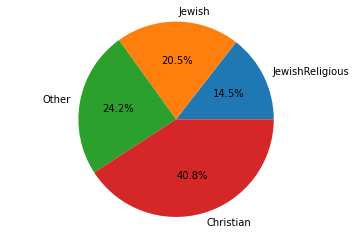

In [ ]:
# religionPlot = df.plot.pie(subplots=True, figsize=(11, 11))
Releg_labels = 'JewishReligious','Jewish','Other', 'Christian'
plt.pie(df_relig,labels=Releg_labels ,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
df_Origin =pd.crosstab(activities.origin,columns="count")
df_Origin = df_Origin.sort_values("count",ascending=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



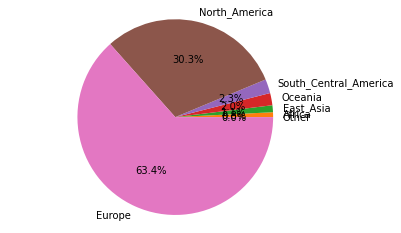

In [ ]:
Orig_labels = 'Other','Africa','East_Asia', 'Oceania', 'South_Central_America', 'North_America', 'Europe'
plt.pie(df_Origin,labels=Orig_labels ,autopct='%2.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
#dropped act_place from dummies for NN
activities=pd.get_dummies(activities, 
                          columns=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"],
                          prefix=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"])
activities.head(3)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one
3,17556,59463,12/2/2015,חוף הים,0,1,0,0,1,12/2/2015,5,5,28,4,54,13,12,0,0%,57%,0%,0%,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
4,92435,846034,4/26/2017,אודיטוריום,0,1,0,0,1,4/23/2017,8,7,44,6,103,13,14,0,0%,0%,0%,100%,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5,20726,266821,4/28/2016,אולם אירועים,0,1,0,0,1,4/27/2016,9,8,37,6,127,19,14,0,0%,100%,0%,0%,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration',ascending=True).head(2000)

,act_name,act_duration
26307,הרובע הארמני,11
13556,הרובע הנוצרי,11
10875,הרובע היהודי,11
14731,תצפית,11
14735,קבר רבי מאיר בעל הנס,11
...,...,...
16638,טיול רגלי,15
28959,שער האשפות,15
29341,טיול רגלי בעיר,15
2754,תצפית,15


In [ ]:
df=pd.crosstab(activities.act_name,columns="count")
df.sort_values("count",ascending=False).head(10)

col_0,count
act_name,
חוף הים,2891
הרובע היהודי,1385
הרובע הנוצרי,951
פאב,723
הכותל המערבי,649
בית כנסת,646
כנסיית הקבר,604
טיול רגלי,562
הרובע המוסלמי,497


####leave only data that each turist came for more then 4 days and had at least 5 activities during the visit 


In [ ]:
activities = activities.loc[activities['total_visit_days'] >= 4]
activities = activities.loc[activities['total_act'] >= 5]
activities.shape

(21002, 70)

##Outliers check and removal

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
corr_df = activities.corr()
#print(corr_df)
 
# cols = corr_df.columns.to_list()
# for i in range(len(cols)):
#   print(cols[i], ': ', end=' ')
#   for j in range(len(cols)):
#     if abs(corr_df.iloc[i,j]) >= abs(0.2) and cols[i] is not cols[j] :
#       print(cols[j],round(corr_df.iloc[i,j],2), end=', ')
#   print()

In [ ]:
#check for outliers 
fig = go.Figure()
fig.add_trace(go.Box(name='total_visit_days', y = activities.total_visit_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='total_act_days', y = activities.total_act_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='total_act', y = activities.total_act , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(name='act_per_day', y = activities.act_per_day , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='act_duration', y = activities.act_duration , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [ ]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [ ]:
act_duration_botrange, act_duration_toprange, act_duration_outliers = get_outliers(activities, activities.act_duration)
print("act_duration col top range = ", act_duration_toprange)
print("act_duration col bottom range = ",act_duration_botrange)

print(act_duration_outliers['act_duration'])

act_duration col top range =  211.0
act_duration col bottom range =  -85.0
21       221
123      279
154      409
198      284
200      465
        ... 
31370    287
31506    250
31509    287
31517    240
31518    242
Name: act_duration, Length: 1127, dtype: int64


In [ ]:
#total_visit_days, total_act_days ,total_act,act_per_day, act_duration
total_visit_days_botrange, total_visit_days_toprange, total_visit_days_outliers = get_outliers(activities, activities.total_visit_days)
total_act_days_botrange, total_act_days_toprange, total_act_days_outliers = get_outliers(activities, activities.total_act_days)
total_act_botrange, total_act_toprange, total_act_outliers = get_outliers(activities, activities.total_act)
act_per_day_botrange, act_per_day_toprange, act_per_day_outliers = get_outliers(activities, activities.act_per_day)


print("total_visit_days col top range = ", total_visit_days_toprange)
print("total_visit_days col bottom range = ",total_visit_days_botrange)

print("total_act_days col top range = ", total_act_days_toprange)
print("total_act_days col bottom range = ",total_act_days_botrange)

print("total_act col top range = ", total_act_toprange)
print("total_act col bottom range = ",total_act_botrange)

print("act_per_day col top range = ", act_per_day_toprange)
print("act_per_day col bottom range = ",act_per_day_botrange)

total_visit_days col top range =  19.5
total_visit_days col bottom range =  -0.5
total_act_days col top range =  17.0
total_act_days col bottom range =  1.0
total_act col top range =  102.5
total_act col bottom range =  -13.5
act_per_day col top range =  16.5
act_per_day col bottom range =  -3.5


###Drop all the outliers we found

In [ ]:
total_visit_days_index_list = [i for i in activities.index if i not in total_visit_days_outliers.index]
total_act_days_index_list = [i for i in activities.index if i not in total_act_days_outliers.index]
total_act_index_list = [i for i in activities.index if i not in total_act_outliers.index]
act_per_day_index_list = [i for i in activities.index if i not in act_per_day_outliers.index]


no_outliers_df = activities.loc[total_visit_days_index_list]
no_outliers_df = activities.loc[total_act_days_index_list]
no_outliers_df = activities.loc[total_act_index_list]
no_outliers_df = activities.loc[act_per_day_index_list]


no_outliers_df.reset_index(inplace=True, drop=True)
activities=no_outliers_df

###standard normalization for numeric columns


In [ ]:

mean=activities.total_visit_days.mean()
activities.total_visit_days-=mean
std=activities.total_visit_days.std()
activities.total_visit_days/=std

mean=activities.total_act_days.mean()
activities.total_act_days-=mean
std=activities.total_act_days.std()
activities.total_act_days/=std

mean=activities.total_act.mean()
activities.total_act-=mean
std=activities.total_act.std()
activities.total_act/=std

mean=activities.act_per_day.mean()
activities.act_per_day-=mean
std=activities.act_per_day.std()
activities.act_per_day/=std

mean=activities.act_duration.mean()
activities.act_duration-=mean
std=activities.act_duration.std()
activities.act_duration/=std

In [ ]:
activities.shape

(20826, 70)

In [ ]:
# convert string % to float values
activities['organized_transportation_precent'] = activities['organized_transportation_precent'].str.rstrip('%').astype('float') / 100.0
activities['taxi_precent'] = activities['taxi_precent'].str.rstrip('%').astype('float') / 100.0
activities['private_vehicle_precent'] = activities['private_vehicle_precent'].str.rstrip('%').astype('float') / 100.0
activities['public_tranport_precent'] = activities['public_tranport_precent'].str.rstrip('%').astype('float') / 100.0

###add the last 2 places column the turist was in befor the current activities 

In [ ]:
#the column "is_1st_act_of_the_day" not show correct values because we delete on the data preparation some records, and that is why we put 1 at the 1st act for each tourist_id and put 0 in the column "is_act_during_the_day"

activities["act_place_before"] = activities.groupby(['tourist_id'])['act_place'].shift(1)
activities["act_place_before"]=np.where(activities['act_place_before'].isnull(),16,activities.act_place_before)
activities["is_first_act_of_day"]=np.where(activities['act_place_before']==16 ,1,0)
activities["is_act_during_day"]=np.where(activities['is_first_act_of_day']==1 ,0,activities.is_act_during_day)

activities["act_place_before2"] = activities.groupby(['tourist_id'])['act_place'].shift(2)
activities["act_place_before2"]=np.where(activities['act_place_before2'].isnull(),16,activities.act_place_before2)

In [ ]:
activities.head(5)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.854205,-0.837902,-0.302516,13,12,0,0.0,0.57,0.0,0.0,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.603250,-0.063430,-0.204238,0.403026,13,14,0,0.0,0.00,0.0,1.0,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16
2,20726,266821,4/28/2016,אולם אירועים,0,1,1,0,0,4/27/2016,-0.171849,-0.280924,-0.409394,-0.204238,0.748598,19,14,0,0.0,1.00,0.0,0.0,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,16,16
3,153888,1554936,10/8/2017,אולפנה?,0,1,1,0,0,10/8/2017,-0.492598,-0.603250,-1.051899,0.746257,-0.172927,20,14,0,0.0,1.00,0.0,0.0,NaN,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,16,16
4,24131,504374,11/3/2016,אוניברסיטה,1,1,1,0,0,10/26/2016,-0.171849,-0.280924,-0.656511,-0.521070,0.143847,16,14,0,1.0,0.00,0.0,0.0,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,16,16


###change the activities hour column to dummy 

In [ ]:
activities[['act_start_hour_morning','act_start_hour_afternoon','act_start_hour_evening','act_start_hour_night']] = np.NaN

activities['act_start_hour_morning'] = np.where((activities['act_start_hour'] >= 5) & (activities['act_start_hour'] <= 12) , 1, 0)
activities['act_start_hour_afternoon'] = np.where((activities['act_start_hour'] > 12) & (activities['act_start_hour'] <= 18) , 1, 0)
activities['act_start_hour_evening'] = np.where((activities['act_start_hour'] > 18) & (activities['act_start_hour'] <= 24) , 1, 0)
activities['act_start_hour_night'] = np.where((activities['act_start_hour'] >= 0) & (activities['act_start_hour'] < 5) , 1, 0)


In [ ]:
activities.head(2)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.24790,-0.854205,-0.837902,-0.302516,13,12,0,0.0,0.57,0.0,0.0,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16,0,1,0,0
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.60325,-0.063430,-0.204238,0.403026,13,14,0,0.0,0.00,0.0,1.0,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16,0,1,0,0


## Adding columns to indicate if the tourist had been in every place before

In [ ]:
tourists_ids=activities.tourist_id.unique()
activities_ids=activities.act_id.unique()

#Create a dictionary to save the activities by ID 
ls={} 
for i in range(len(tourists_ids)):
  tmp=activities["act_place"].loc[activities["tourist_id"]==tourists_ids[i]]
  ls[str(tourists_ids[i])]=tmp.to_numpy()

In [ ]:
#print(ls)

###add dummy columns for check where is the place the turist was (not neccesarly the last 2 activities)

In [ ]:
g = activities.groupby("tourist_id")
for c in activities["act_place"].unique():
    activities["was_in_{}".format(c)] = g["act_place"].transform(
        lambda x: (x == c)
        .shift()
        .replace(False, np.nan)
        .ffill()
        .fillna(0)
        .astype(int)
    )

print(activities)


       tourist_id   act_id    act_date  ... was_in_8 was_in_0 was_in_3
0           17556    59463   12/2/2015  ...        0        0        0
1           92435   846034   4/26/2017  ...        0        0        0
2           20726   266821   4/28/2016  ...        0        0        0
3          153888  1554936   10/8/2017  ...        0        0        0
4           24131   504374   11/3/2016  ...        0        0        0
...           ...      ...         ...  ...      ...      ...      ...
20821      193295  1622756  11/24/2017  ...        0        0        0
20822      173769  1608111   11/2/2017  ...        1        0        0
20823       22423   403852   8/12/2016  ...        0        0        0
20824       17689    73505  12/16/2015  ...        0        0        0
20825       22232   390355    8/1/2016  ...        0        0        0

[20826 rows x 91 columns]


In [ ]:
activities.head(3)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,...,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night,was_in_12,was_in_14,was_in_11,was_in_13,was_in_7,was_in_9,was_in_10,was_in_6,was_in_2,was_in_4,was_in_5,was_in_1,was_in_8,was_in_0,was_in_3
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.854205,-0.837902,-0.302516,13,12,0,0.0,0.57,0.0,0.0,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.603250,-0.063430,-0.204238,0.403026,13,14,0,0.0,0.00,0.0,1.0,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20726,266821,4/28/2016,אולם אירועים,0,1,1,0,0,4/27/2016,-0.171849,-0.280924,-0.409394,-0.204238,0.748598,19,14,0,0.0,1.00,0.0,0.0,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,16,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Build and run the Neural Network 
####(3 hidden layers and softmax output for classification)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

In [ ]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(128,activation='sigmoid',input_shape=(train_data.shape[1],))) #input layer
  model.add(Dropout(0.3))
  model.add(layers.Dense(512,activation='tanh')) #hidden layer
  model.add(Dropout(0.4))
  model.add(layers.Dense(512,activation='tanh')) #hidden layer
  model.add(Dropout(0.4))
  model.add(layers.Dense(512,activation='tanh')) #hidden layer
  model.add(Dropout(0.3))
  model.add(layers.Dense(15,activation='softmax')) #output layer
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  print("model compiled succesfully")
  return model

In [ ]:
#droping: 'organized_transportation_precent','taxi_precent','private_vehicle_precent','public_tranport_precent','act_month_1','act_month_2', 'act_month_3', 'act_month_4', 'act_month_5','act_month_6', 'act_month_7', 'act_month_8', 'act_month_9','act_month_10',
# 'act_month_11', 'act_month_12', 'act_year_2015','act_year_2016', 'act_year_2017',
from sklearn.model_selection import train_test_split
X=activities[['is_first_visit','is_long_visit','is_first_act_of_day','is_last_act_of_day','is_act_during_day','total_visit_days','total_act_days','total_act','act_per_day','act_duration','act_start_hour','is_organized_day_trip',
              'visit_purpose_Family&Friends','visit_purpose_Travel&Religion','visit_purpose_business','religion_Christian','religion_Jewish','religion_JewishReligious','religion_Other','origin_Africa','origin_East_Asia','origin_Europe',
              'origin_North_America','origin_Oceania','origin_Other','origin_South_Central_America','arrival_season_Christmas','arrival_season_Spring','arrival_season_Summer','arrival_season_Tishrei_Holidays','arrival_season_Winter',
              'act_weekday_Friday','act_weekday_Monday','act_weekday_Saturday','act_weekday_Sunday','act_weekday_Thursday','act_weekday_Tuesday','act_weekday_Wednesday','day_category_First_Day','day_category_Last_Day','day_category_Normal_Day',
              'jerusalem_visiting_category_0','jerusalem_visiting_category_1','jerusalem_visiting_category_More_than_one','act_start_hour_morning','act_start_hour_afternoon','act_start_hour_evening','act_start_hour_night','act_place_before',
              'act_place_before2','was_in_0','was_in_1','was_in_2','was_in_3','was_in_4','was_in_5','was_in_6','was_in_7','was_in_8','was_in_9','was_in_10','was_in_11','was_in_12','was_in_13','was_in_14']]  # predictors
X = np.asarray(X).astype(np.float32)
print(X.shape)
y=activities['act_place'] # response variable

train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)

(20826, 65)


In [ ]:
#train_targets

In [ ]:
from tensorflow.keras.utils import to_categorical
train_targets = to_categorical(train_targets)
test_targets=to_categorical(test_targets)

In [ ]:
print("train targets: ",train_targets.shape)
print("test targets: ",test_targets.shape)
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)

train targets:  (16660, 15)
test targets:  (4166, 15)
train data shape:  (16660, 65)
test data shape:  (4166, 65)


####Option to run the network with K-fold

In [ ]:
k=4
num_val_samples=len(train_data)
num_epochs=100
all_scores=[]

In [ ]:
# for i in range (1,k):
#   print('processing fold #', i)
#   partial_train_data, val_data, partial_train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=123*k) 
#   print(partial_train_data.shape, partial_train_targets.shape)
#   model=build_model()
#   model.summary()
#   history= model.fit(partial_train_data,
#                      partial_train_targets,
#                      epochs=100,
#                      batch_size=512,
#                      validation_data=(val_data,val_targets),
#                      verbose=0)
#   val_loss, val_acc= model.evaluate(val_data,val_targets,verbose=0)
#   all_scores.append(val_acc)

In [ ]:
partial_train_data, val_data, partial_train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=123*k)
model=build_model()
history= model.fit(partial_train_data,
                     partial_train_targets,
                     epochs=200,
                     batch_size=512,
                     validation_data=(val_data,val_targets),
                     verbose=0)
val_loss, val_acc= model.evaluate(val_data,val_targets,verbose=0)

model compiled succesfully


In [ ]:
print("validation acc: ",val_acc)
print("validation loss: ",val_loss)

validation acc:  0.6785714030265808
validation loss:  1.0619255304336548


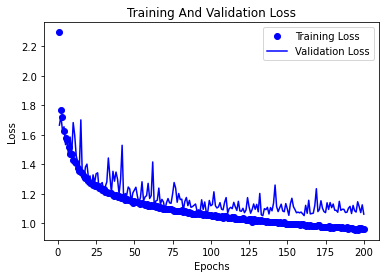

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

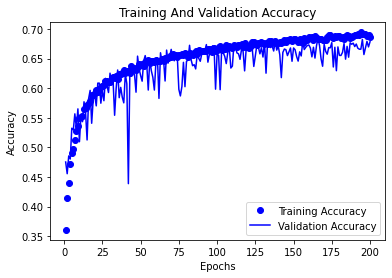

In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_targets)

131/131 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.6791


In [ ]:
print("test acc: ",test_acc)
print("test loss: ",test_loss)

test acc:  0.6790686249732971
test loss:  1.0706793069839478


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
def to_classes(arr):
  rows, cols = (arr.shape[0],arr.shape[1]) 
  result=np.zeros(arr.shape[0],)
  max=0
  index=0
  for i in range(rows):
    for j in range(cols):
      if arr[i][j]>max:
           max=arr[i][j]
           index=j
    result[i]=index
    max=0 
  return result

In [ ]:
test_pred= model.predict(test_data,verbose=0)
test_pred_classes=to_classes(test_pred)
test_targets_classes=to_classes(test_targets)
#print(val_pred_classes.shape,val_targets_classes.shape)
#print(val_pred_classes,val_targets_classes)
#print(confusion_matrix(test_targets_classes,test_pred_classes,normalize='all'))
report = classification_report(test_targets_classes, test_pred_classes)
print(report)

              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12        24
         1.0       0.40      0.07      0.12        27
         2.0       0.33      0.24      0.28        33
         3.0       0.44      0.39      0.41        31
         4.0       0.31      0.05      0.09        73
         5.0       0.35      0.09      0.14        67
         6.0       0.36      0.20      0.25        51
         7.0       0.20      0.12      0.15        41
         8.0       0.58      0.55      0.56        33
         9.0       0.64      0.20      0.30       106
        10.0       0.52      0.69      0.60       159
        11.0       0.49      0.48      0.49       258
        12.0       0.63      0.24      0.35       579
        13.0       0.54      0.82      0.65       882
        14.0       0.85      0.91      0.88      1802

    accuracy                           0.68      4166
   macro avg       0.46      0.34      0.36      4166
weighted avg       0.67   